# Baseball Case Study
### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [1]:
#First we will import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

# Loading the dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# checking the top 5 rows using the function head
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# checking the bottom top 5 rows using the function tail
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


By looking at our dataset we can say that our dataset is small due to column names, But we are unable to understand what are the column names though we have given in the problem statement that:

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)
    
##### We will need to take help of the link shared in the problem statement to confirm the names of columns.
"https://en.wikipedia.org/wiki/Baseball_statistics"

# EDA (Exploratory Data Analysis)

In [5]:
# first lets chewck the columns of our dataset:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Column Names and their description:
- 1. w - It is basically our target variable and W means "Wins".
- 2. R - It is our input feature and R means "Runs".
- 3. AB - It is our input feature and AB means "At Bats".
- 4. H - It is our input feature and H means "Hits".
- 5. 2B - It is input feature and 2B means "Doubles".
- 6. 3B - It is input feature and 3B means "Triples".
- 7. HR - It is input feature and HR means "Homeruns".
- 8. BB - It is input feature and BB means "Walks".
- 9. SO - It is input feature and SO means "Strikeout".
- 10. SB - It is input feature and SB means "Stolen bases".
- 11. RA - It is input feature and RA means "Runs Allowed".
- 12. ER - It is input feature and ER means "Earned Runs".
- 13. ERA - It is input feature and ERA means "Earned Run Average".
- 14. CG - It is input feature and CG means "Complete games".
- 15. SHO - It is input feature and SHO means "Save opportunity".
- 16. SV - It is input feature and SV means "Saves".
- 17. E - It is input feature and E means "Errors".

In [6]:
# Lets change the column names so that while working we can understand the columns easily:
df.columns = ['Wins','Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeout','Stolen Bases','Runs Allowed','Earned Runs','Earned run average','Complete game','Save opportunity','Save','Errors']
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeout', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned run average', 'Complete game', 'Save opportunity', 'Save',
       'Errors'],
      dtype='object')

In [7]:
# After changing the columns now lets check our dataset:
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Earned Runs,Earned run average,Complete game,Save opportunity,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


- Now all these columns are in undesrstandable format.

In [8]:
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Earned Runs,Earned run average,Complete game,Save opportunity,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [9]:
df.shape

(30, 17)

- Our dataset is having 30 rows and 17 columns.

In [10]:
# Lets check all the datatypes of our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeout           30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned run average  30 non-null     float64
 13  Complete game       30 non-null     int64  
 14  Save opportunity    30 non-null     int64  
 15  Save                30 non-null     int64  
 16  Errors    

- We can see that we have only 1 float datatype and rest 16 columns have integer datatype.

- Since there is no object datatype present in our dataset so encoding process will not be needed.

In [11]:
# Lets check the missing data if any:
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeout             0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned run average    0
Complete game         0
Save opportunity      0
Save                  0
Errors                0
dtype: int64

- We can see that our dataset is having no missing or null values in it, so we do not need to handle missing data.

In [12]:
# Lets check if there are any duplicate values in our dataset:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

- There are no duplicate values in our dataset.

In [13]:
#Exploring the data variables:
df.Wins.value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64

### Lets check the relation between all inputs with the output/target variable "Wins"

In [14]:
np.corrcoef(df['Wins'],df['Runs'])

array([[1.        , 0.43075053],
       [0.43075053, 1.        ]])

##### Runs are 0.43 positively correlated with Wins.

In [15]:
np.corrcoef(df['Wins'],df['At Bats'])

array([[ 1.        , -0.08794664],
       [-0.08794664,  1.        ]])

##### At Bats are negatively -0.087 related to wins.

In [16]:
np.corrcoef(df['Wins'],df['Hits'])

array([[1.        , 0.03761244],
       [0.03761244, 1.        ]])

##### Hits are positively 0.037 related to wins.

In [17]:
np.corrcoef(df['Wins'],df['Doubles'])

array([[1.        , 0.42779687],
       [0.42779687, 1.        ]])

##### Doubles are positively 0.42 related to wins.

In [18]:
np.corrcoef(df['Wins'],df['Triples'])

array([[ 1.        , -0.25111773],
       [-0.25111773,  1.        ]])

##### Triples are negatively -0.251 related with wins.

In [19]:
np.corrcoef(df['Wins'],df['Homeruns'])

array([[1.        , 0.30740738],
       [0.30740738, 1.        ]])

##### Homeruns are positively 0.307 related with wins.

In [20]:
np.corrcoef(df['Wins'],df['Walks'])

array([[1.       , 0.4843417],
       [0.4843417, 1.       ]])

##### Walks are positively 0.48 related with wins.

In [21]:
np.corrcoef(df['Wins'],df['Strikeout'])

array([[1.        , 0.11184973],
       [0.11184973, 1.        ]])

##### Strikeout are positively 0.111 related with wins.

In [22]:
np.corrcoef(df['Wins'],df['Stolen Bases'])

array([[ 1.        , -0.15723408],
       [-0.15723408,  1.        ]])

##### Stolen Bases are positively -0.157 related with wins.

In [23]:
np.corrcoef(df['Wins'],df['Runs Allowed'])

array([[ 1.       , -0.8129519],
       [-0.8129519,  1.       ]])

##### Runs Allowed are positively -0.812 related with wins.

In [24]:
np.corrcoef(df['Wins'],df['Earned Runs'])

array([[ 1.        , -0.80943475],
       [-0.80943475,  1.        ]])

##### Earned Runs are positively 0.809 related with wins.

In [25]:
np.corrcoef(df['Wins'],df['Earned run average'])

array([[ 1.        , -0.81959971],
       [-0.81959971,  1.        ]])

##### Earned run average are positively -0.819 related with wins.

In [26]:
np.corrcoef(df['Wins'],df['Complete game'])

array([[1.        , 0.08053344],
       [0.08053344, 1.        ]])

##### Complete game are positively 0.080 related with wins.

In [27]:
np.corrcoef(df['Wins'],df['Save opportunity'])

array([[1.        , 0.47180516],
       [0.47180516, 1.        ]])

##### Save Opportunity are positively 0.471 related with wins.

In [28]:
np.corrcoef(df['Wins'],df['Save'])

array([[1.        , 0.66652962],
       [0.66652962, 1.        ]])

##### Save are positively 0.666 related with wins.

In [29]:
np.corrcoef(df['Wins'],df['Errors'])

array([[ 1.        , -0.08948462],
       [-0.08948462,  1.        ]])

##### Errors are positively -0.089 related with wins.

In [30]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Earned Runs,Earned run average,Complete game,Save opportunity,Save,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


- As per above description we can see that count of all the columns is 30.0 that means there is no missing value.
- Also other columns like mean,standard deviation,minimum values,25% quartile, 50% quartile, 75% quartile and maximum values we can see that they are progressing in a definite manner and there are no visible abnormalities.

### Skewness

In [31]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeout            -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned run average    0.053331
Complete game         0.736845
Save opportunity      0.565790
Save                  0.657524
Errors                0.890132
dtype: float64

- The range of skewness is +/-0.5.
- The columns which are out of this range are Runs,Hits,Runs allowed,Earned runs,earned runs average,complete game,saves,errors.
- We will check if this skewness needs to be treated or not.

In [32]:
# Lets check all the number of unique values of our dataset.
df.nunique()

Wins                  24
Runs                  28
At Bats               29
Hits                  29
Doubles               22
Triples               23
Homeruns              27
Walks                 29
Strikeout             29
Stolen Bases          27
Runs Allowed          30
Earned Runs           30
Earned run average    30
Complete game          9
Save opportunity      12
Save                  20
Errors                21
dtype: int64

In [33]:
# Lets check the unique values of our target variable "Wins".
df['Wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [34]:
# Lets check the unique values of "Runs".
df['Runs'].unique()

array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

In [35]:
# Lets check the unique values of "Hits"
df['Hits'].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [36]:
# Lets check the unique values of "At Bats"
df['At Bats'].unique()

array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

In [37]:
# Lets check the unique values of "Doubles"
df['Doubles'].unique()

array([300, 277, 303, 260, 289, 308, 272, 246, 278, 294, 279, 243, 262,
       288, 292, 274, 257, 295, 265, 236, 251, 263], dtype=int64)

In [38]:
# Lets check the unique values of "Triples"
df['Triples'].unique()

array([42, 44, 29, 27, 49, 17, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34,
       13, 40, 18, 37, 48, 36], dtype=int64)

In [39]:
# Lets check the unique values of "Homeruns"
df['Homeruns'].unique()

array([139, 156, 141, 136, 151, 232, 212, 217, 167, 161, 172, 230, 176,
       198, 146, 137, 140, 171, 145, 177, 120, 100, 130, 187, 154, 148,
       186], dtype=int64)

In [40]:
# Lets check the unique values of "Walks"
df['Walks'].unique()

array([383, 439, 533, 404, 455, 570, 554, 418, 436, 478, 503, 486, 435,
       475, 506, 461, 567, 412, 496, 488, 539, 375, 471, 387, 563, 457,
       490, 426, 388], dtype=int64)

In [41]:
# Lets check the unique values of "Strikeout"
df['Strikeout'].unique()

array([ 973, 1264, 1157, 1231, 1259, 1151, 1227, 1331, 1310, 1148, 1233,
       1392, 1150, 1336, 1119, 1267, 1322, 1518, 1299, 1255, 1290, 1344,
       1107, 1274, 1258, 1159, 1312, 1327, 1283], dtype=int64)

In [42]:
# Lets check the unique values of "Stolen Bases"
df['Stolen Bases'].unique()

array([104,  70,  86,  68,  83,  88,  63,  44,  87,  71, 101, 121,  52,
        69,  78,  98,  95,  84, 134,  51,  57, 112,  59,  93, 132,  82,
        97], dtype=int64)

In [43]:
# Lets check the unique values of "Runs allowed"
df['Runs Allowed'].unique()

array([641, 700, 640, 701, 803, 670, 698, 693, 642, 753, 733, 618, 675,
       726, 729, 525, 596, 608, 737, 754, 613, 635, 678, 760, 809, 595,
       627, 713, 731, 844], dtype=int64)

In [44]:
# Lets check the unique values of "Earned runs"
df['Earned Runs'].unique()

array([601, 653, 584, 643, 746, 609, 652, 646, 604, 694, 680, 572, 630,
       677, 664, 478, 532, 546, 682, 700, 557, 577, 638, 698, 749, 553,
       597, 659, 655, 799], dtype=int64)

In [45]:
# Lets check the unique values of "Earned run average"
df['Earned run average'].unique()

array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

In [46]:
# Lets check the unique values of "Complete game"
df['Complete game'].unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

In [47]:
# Lets check th unique value of "Save opportunity"
df['Save opportunity'].unique()

array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

In [48]:
# Lets check the unique values of "Save"
df['Save'].unique()

array([56, 45, 38, 37, 35, 34, 48, 43, 60, 40, 39, 46, 28, 62, 54, 50, 41,
       44, 47, 36], dtype=int64)

In [49]:
# Lets check the unique values of "Errors"
df['Errors'].unique()

array([ 88,  86,  79, 101,  93,  77,  95,  97, 119,  85,  94, 126,  96,
       122, 111, 116,  90, 117,  75,  78,  92], dtype=int64)

# Visualization of data using Distribution plot

<AxesSubplot:xlabel='Wins', ylabel='Density'>

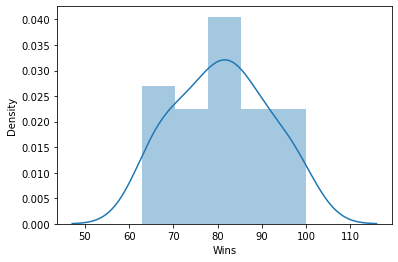

In [50]:
sns.distplot(df['Wins'])

- The above fig. shows the distribution plot for column "Wins"

<AxesSubplot:xlabel='Runs', ylabel='Density'>

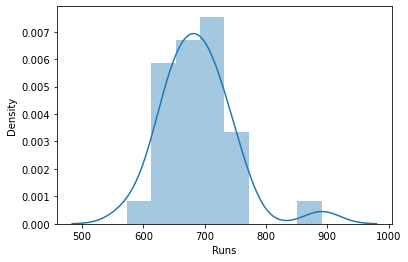

In [51]:
sns.distplot(df['Runs'])

- - The above fig. shows the distribution plot for column "Runs"

<AxesSubplot:xlabel='Hits', ylabel='Density'>

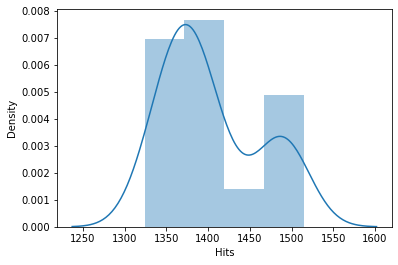

In [52]:
sns.distplot(df['Hits'])

- The above fig. shows the distribution plot for column "Hits"

<AxesSubplot:xlabel='At Bats', ylabel='Density'>

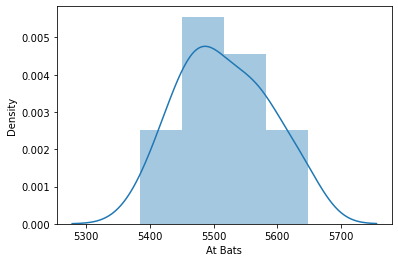

In [53]:
sns.distplot(df['At Bats'])

- The above fig. shows the distribution plot for column "At Bats"

<AxesSubplot:xlabel='Doubles', ylabel='Density'>

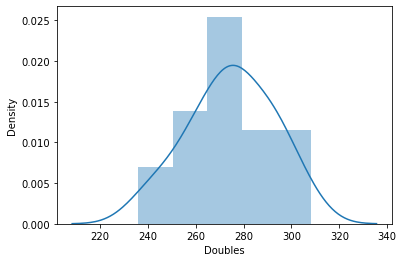

In [54]:
sns.distplot(df['Doubles'])

- The above fig. shows the distribution plot for column "Doubles"

<AxesSubplot:xlabel='Triples', ylabel='Density'>

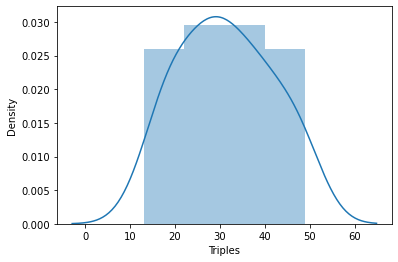

In [55]:
sns.distplot(df['Triples'])

- The above fig. shows the distribution plot for column "Triples"

<AxesSubplot:xlabel='Homeruns', ylabel='Density'>

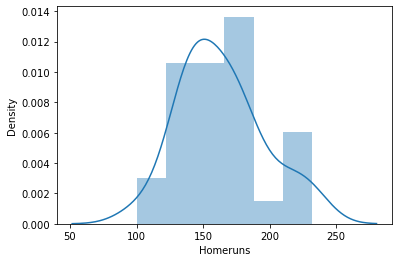

In [56]:
sns.distplot(df['Homeruns'])

- The above fig. shows the distribution plot for column "Homeruns"

<AxesSubplot:xlabel='Walks', ylabel='Density'>

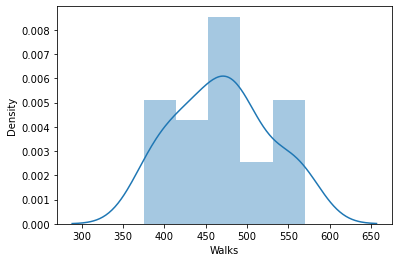

In [57]:
sns.distplot(df['Walks'])

- The above fig. shows the distribution plot for column "Walks"

<AxesSubplot:xlabel='Strikeout', ylabel='Density'>

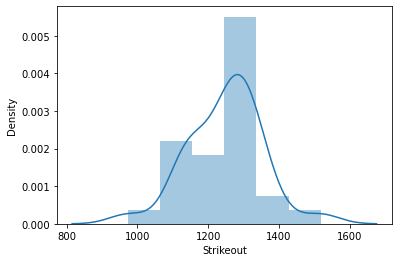

In [58]:
sns.distplot(df['Strikeout'])

- The above fig. shows the distribution plot for column "Strikeout"

<AxesSubplot:xlabel='Stolen Bases', ylabel='Density'>

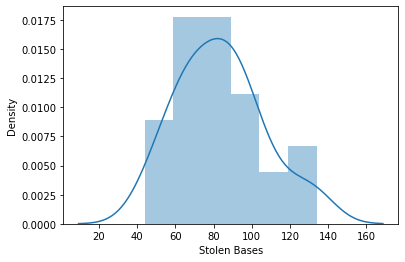

In [59]:
sns.distplot(df['Stolen Bases'])

- The above fig. shows the distribution plot for column "Stolen Bases"

<AxesSubplot:xlabel='Runs Allowed', ylabel='Density'>

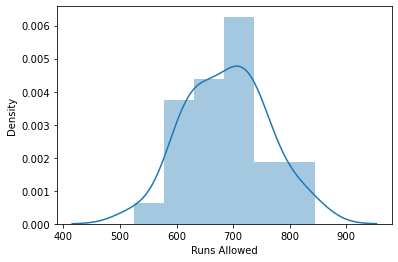

In [60]:
sns.distplot(df['Runs Allowed'])

- The above fig. shows the distribution plot for column "Runs Allowed"

<AxesSubplot:xlabel='Earned Runs', ylabel='Density'>

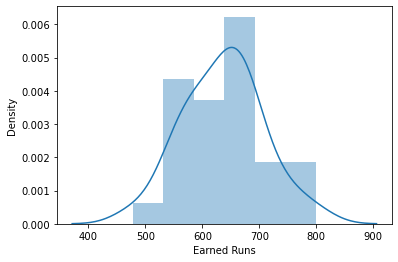

In [61]:
sns.distplot(df['Earned Runs'])

- The above fig. shows the distribution plot for column "Earned Runs"

<AxesSubplot:xlabel='Earned run average', ylabel='Density'>

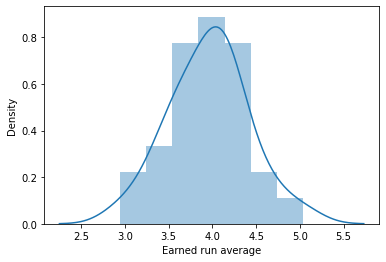

In [62]:
sns.distplot(df['Earned run average'])

- The above fig. shows the distribution plot for column "Earned run average"

<AxesSubplot:xlabel='Complete game', ylabel='Density'>

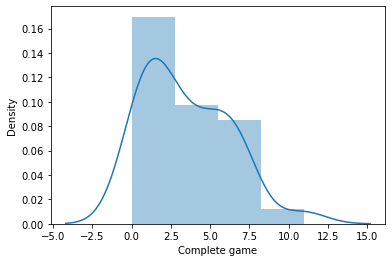

In [63]:
sns.distplot(df['Complete game'])

- The above fig. shows the distribution plot for column "Complete game"

<AxesSubplot:xlabel='Save opportunity', ylabel='Density'>

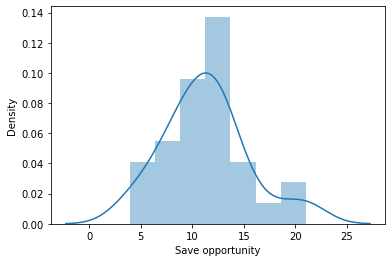

In [64]:
sns.distplot(df['Save opportunity'])

- The above fig. shows the distribution plot for column "Save opportunity"

<AxesSubplot:xlabel='Save', ylabel='Density'>

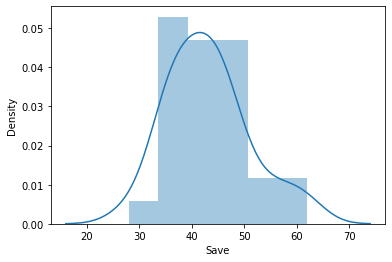

In [65]:
sns.distplot(df['Save'])

- The above fig. shows the distribution plot for column "Save"

<AxesSubplot:xlabel='Errors', ylabel='Density'>

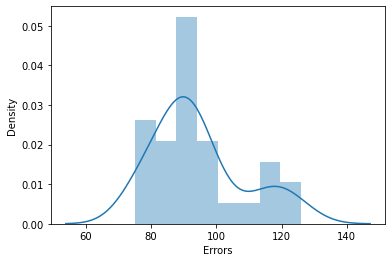

In [66]:
sns.distplot(df['Errors'])

- The above fig. shows the distribution plot for column "Errors"

# Visualization of data using strip Plot

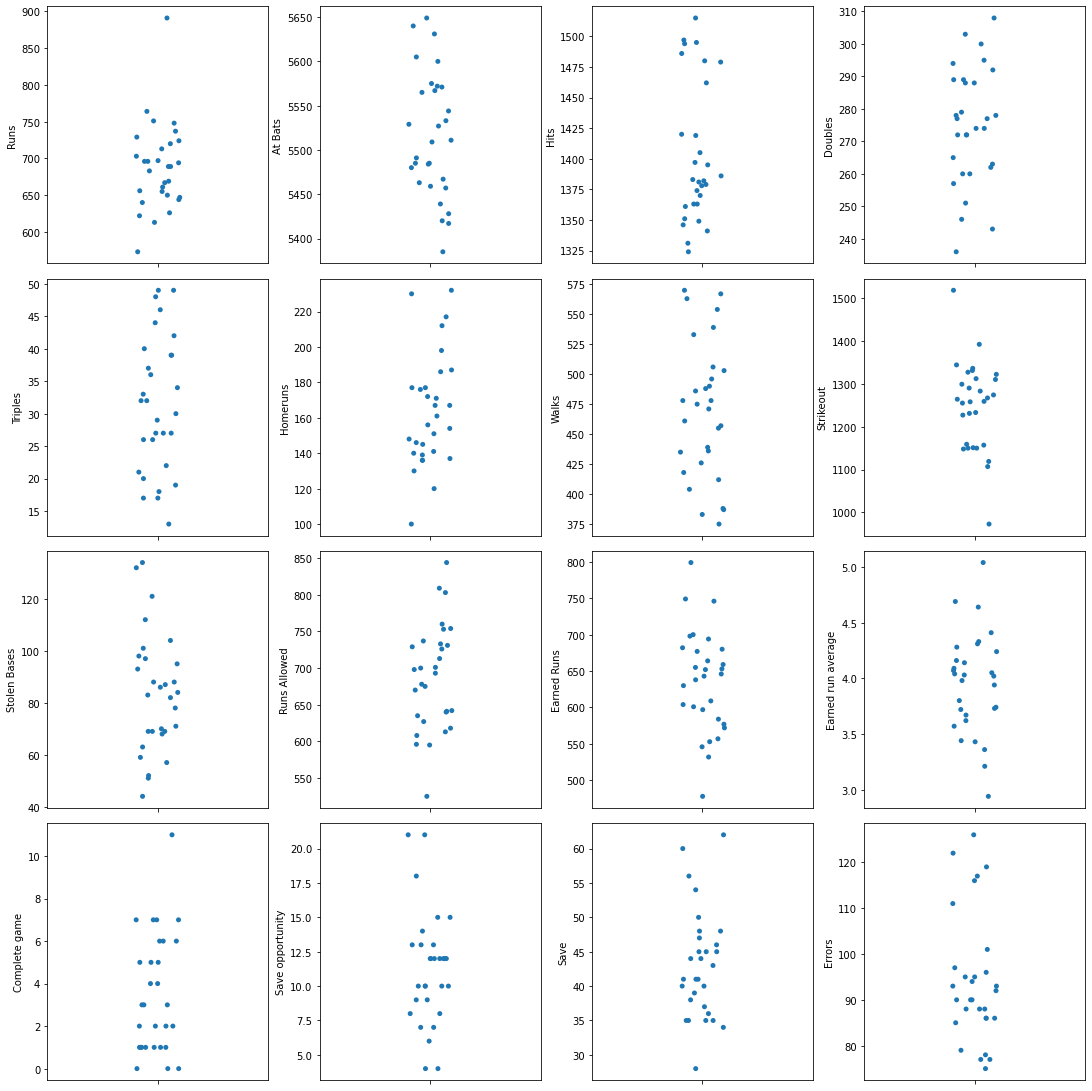

In [67]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

- As per the above strip plot we can see data point distribution across the dataset and its range details.

# Visualization of data using Boxplot

<AxesSubplot:xlabel='Wins'>

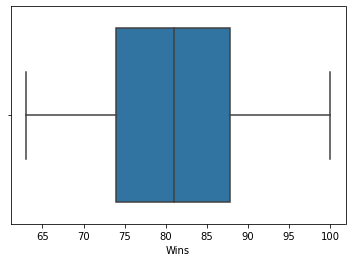

In [68]:
sns.boxplot(df['Wins'])

- We can see that there are no outliers in our target variable "Wins".

<AxesSubplot:xlabel='Runs'>

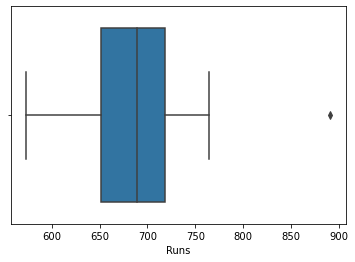

In [69]:
sns.boxplot(df['Runs'])

- We can see that there is 1 outlier in "runs" column.

<AxesSubplot:xlabel='At Bats'>

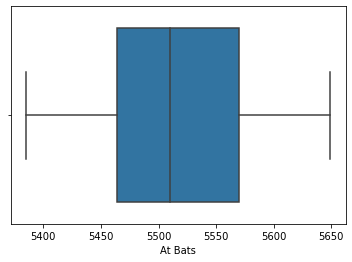

In [70]:
sns.boxplot(df['At Bats'])

- We can see that there are no outliers in "At bats column"

<AxesSubplot:xlabel='Hits'>

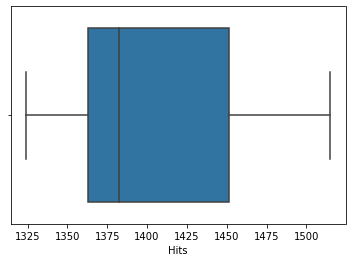

In [71]:
sns.boxplot(df['Hits'])

- We can see that there are no outliers in "Hits" column

<AxesSubplot:xlabel='Doubles'>

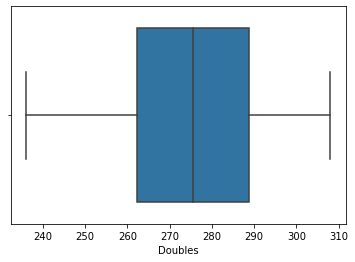

In [72]:
sns.boxplot(df['Doubles'])

- We can see that there are no outliers in "Doubles" column.

<AxesSubplot:xlabel='Triples'>

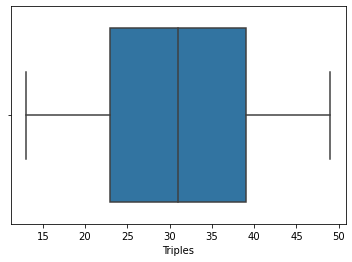

In [73]:
sns.boxplot(df['Triples'])

- We can see that there are no outliers in "Triples" column

<AxesSubplot:xlabel='Homeruns'>

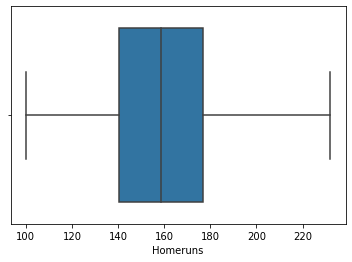

In [74]:
sns.boxplot(df['Homeruns'])

- We can see that there are no outliers in "Homeruns" column

<AxesSubplot:xlabel='Walks'>

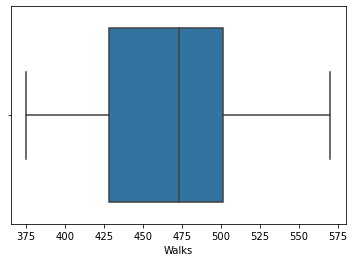

In [75]:
sns.boxplot(df['Walks'])

- We can see that there are no outliers in "Walks" column

<AxesSubplot:xlabel='Strikeout'>

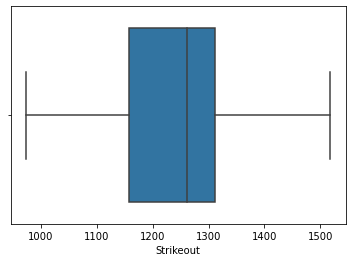

In [76]:
sns.boxplot(df['Strikeout'])

- We can see that there are no outliers in "Strikeout" column

<AxesSubplot:xlabel='Stolen Bases'>

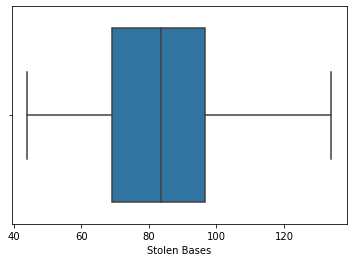

In [77]:
sns.boxplot(df['Stolen Bases'])

- We can see that there are no outliers in "Stolen Bases" column

<AxesSubplot:xlabel='Runs Allowed'>

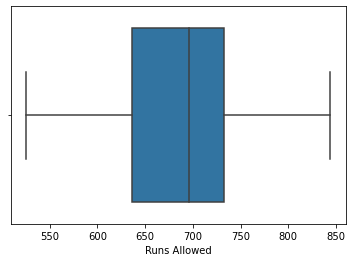

In [78]:
sns.boxplot(df['Runs Allowed'])

- We can see that there are no outliers in "Runs allowed" column.

<AxesSubplot:xlabel='Earned Runs'>

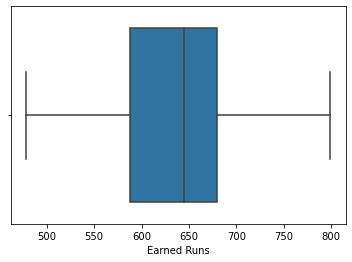

In [79]:
sns.boxplot(df['Earned Runs'])

- We can see that there are no outliers in "Earned runs" column.

<AxesSubplot:xlabel='Earned run average'>

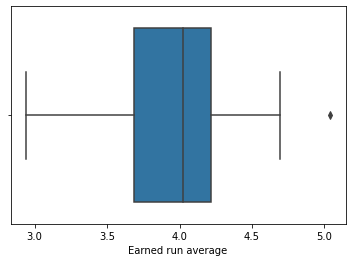

In [80]:
sns.boxplot(df['Earned run average'])

- We can see that there is 1 outlier in "Earned run average" column.

<AxesSubplot:xlabel='Complete game'>

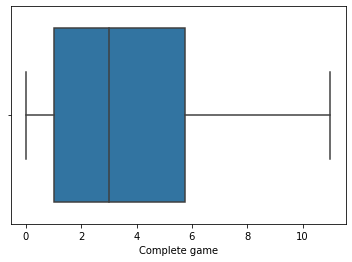

In [81]:
sns.boxplot(df['Complete game'])

- We can see that there isno outlier in "Complete game" column.

<AxesSubplot:xlabel='Save opportunity'>

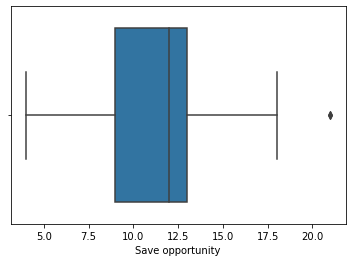

In [82]:
sns.boxplot(df['Save opportunity'])

- We can see that there is 1 outlier in 'Save opportunity' column.

<AxesSubplot:xlabel='Save'>

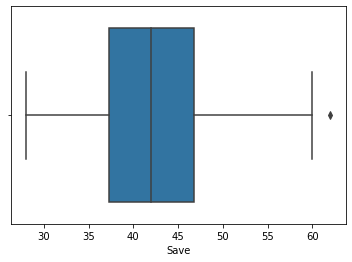

In [83]:
sns.boxplot(df['Save'])

- We can see that there is 1 outlier in "Save" column

<AxesSubplot:xlabel='Errors'>

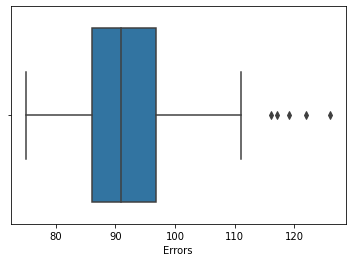

In [84]:
sns.boxplot(df['Errors'])

- We can see that there are more outliers in 'Errors' column.

# Visualization of data using Pair plot

<Figure size 1080x720 with 0 Axes>

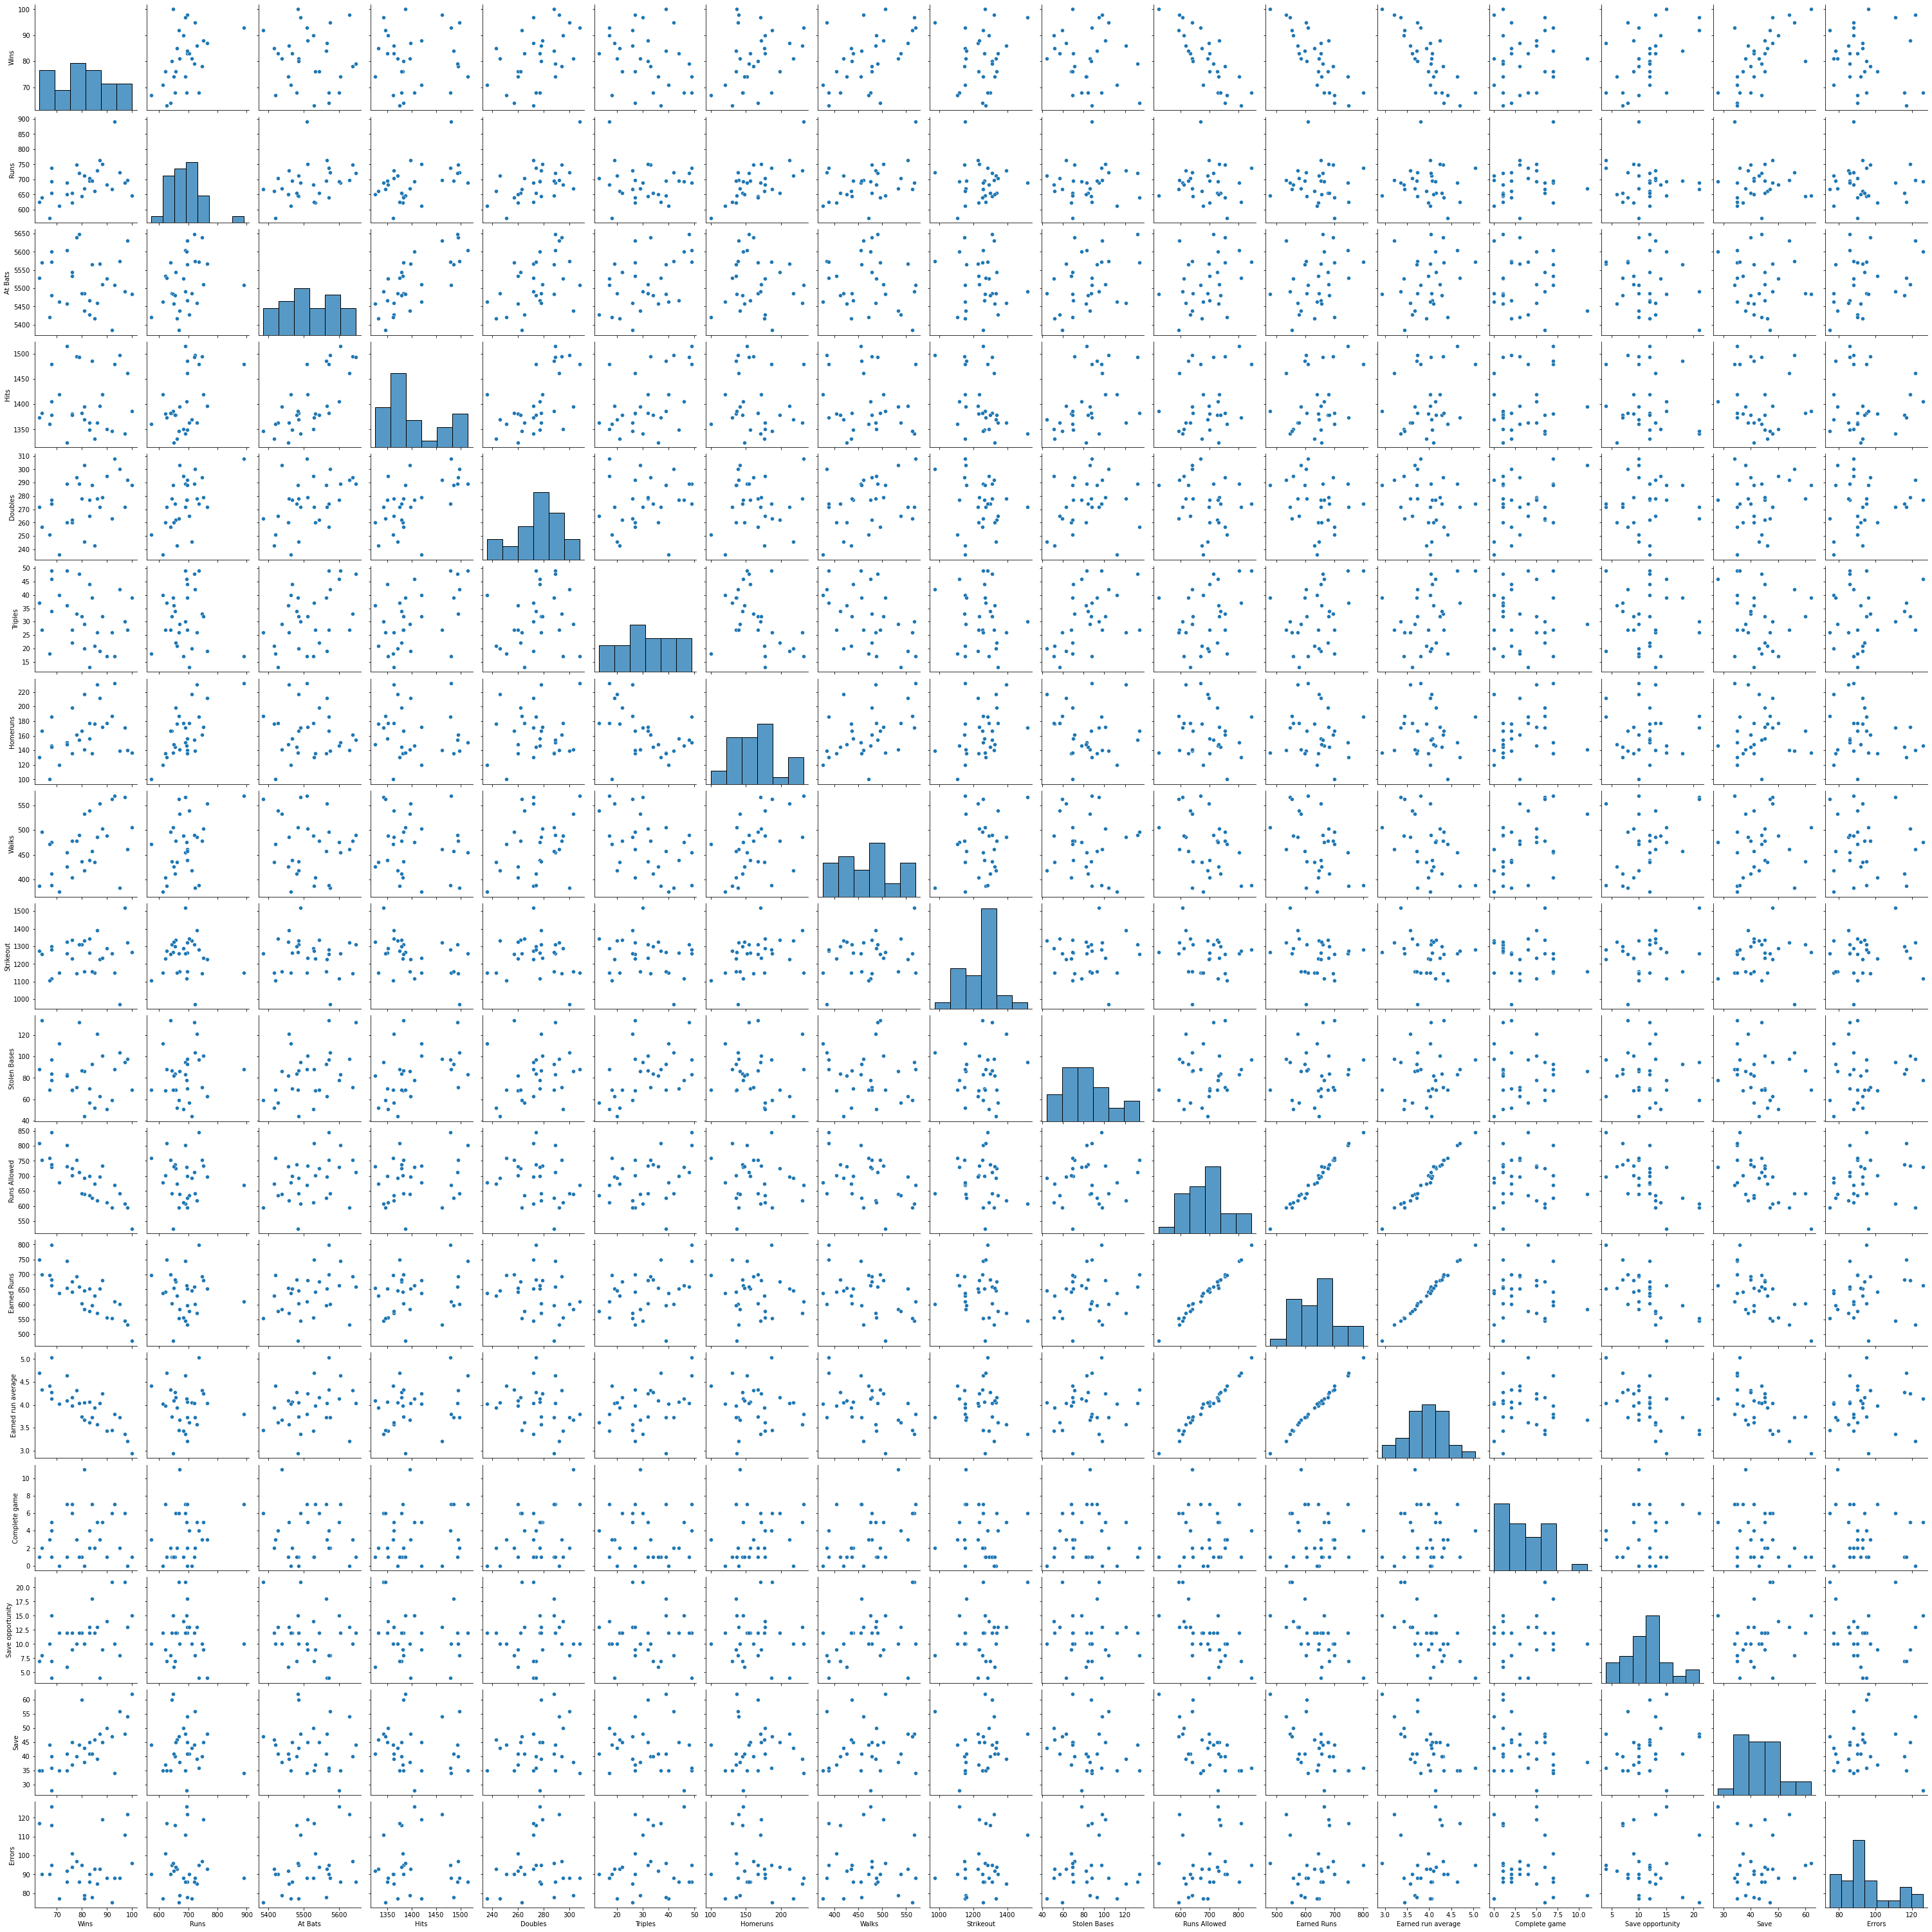

In [85]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

# Visualization of data using bivariate analysis

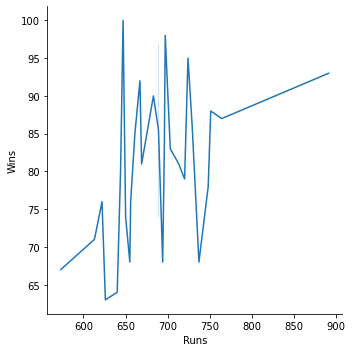

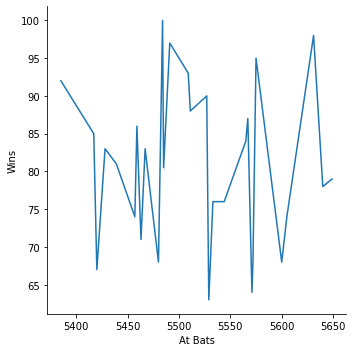

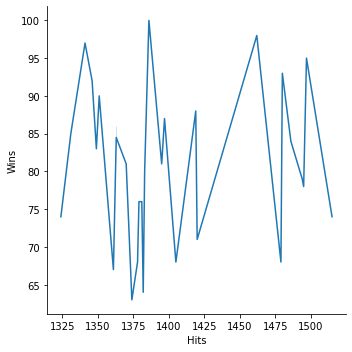

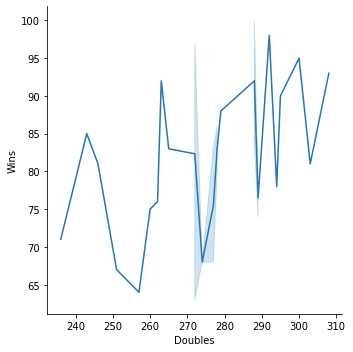

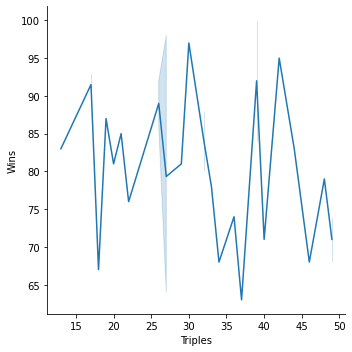

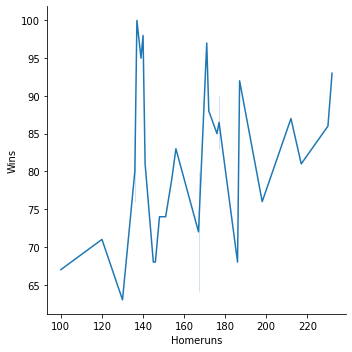

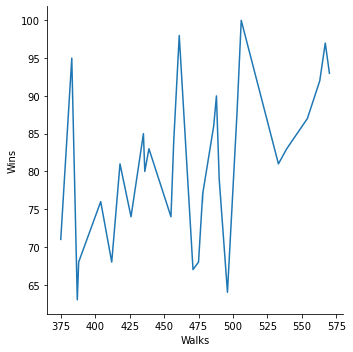

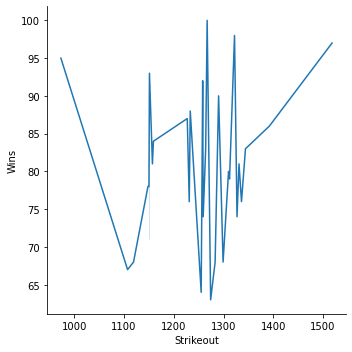

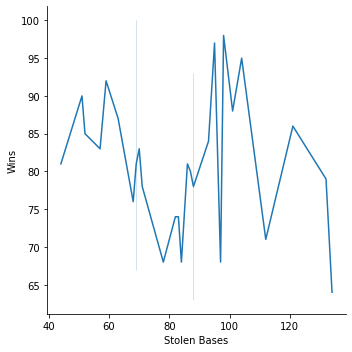

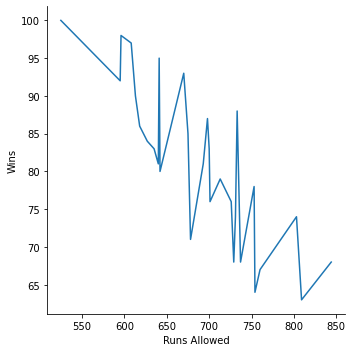

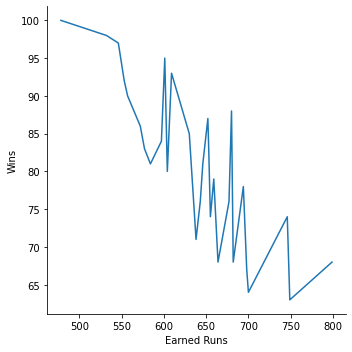

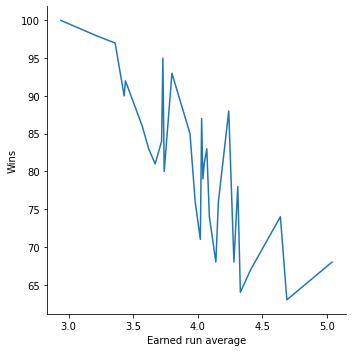

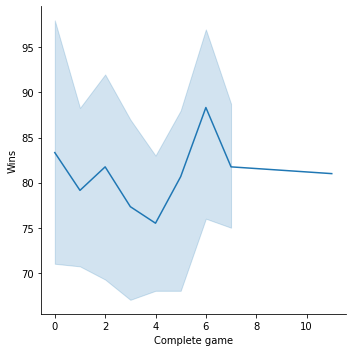

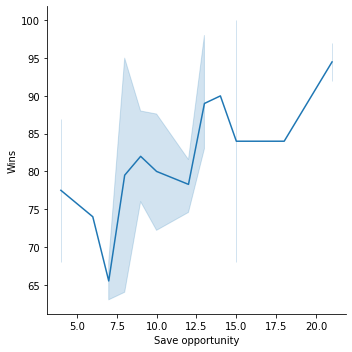

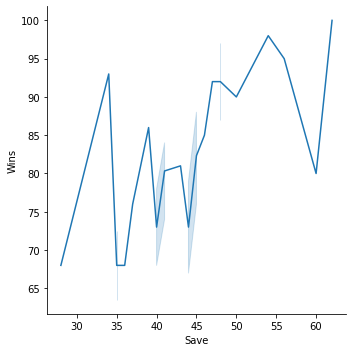

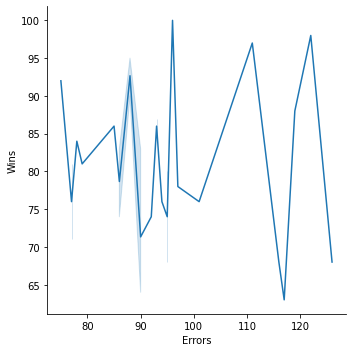

In [86]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

- As per above observations, all the line plots corresponding to the "Wins" column shows that how those features are related with the contribution on getting those particular numbers. 

- Some of them are directly proportional while others are either inversely proportional to our label or do not have much to offer.

- So we can say that the relationships between the label and all the features can be viewed from above graphs: 
    
### All of the above features (except the errors) are positively correlated with our label.
##### In case the number of runs increases then the chance of win increases obviously 
##### In case the doubles increase then the chance of win increases 
##### In case the triples increases then the chance of win increases 
##### In case the home runs increases then the chance of win increases 
##### In case the walks on balls increases then the chance of win increases 
##### In case the strike outs increases then the chance of win increases for the opposite team 
##### In case the stolen bases increases then the chance of win increases for the opposite team 
##### In case the runs allowed increases then the chance of win increases 
##### In case the earned run and earned run average increases the chance of win increases automatically

# Visualization of data using Bar plot

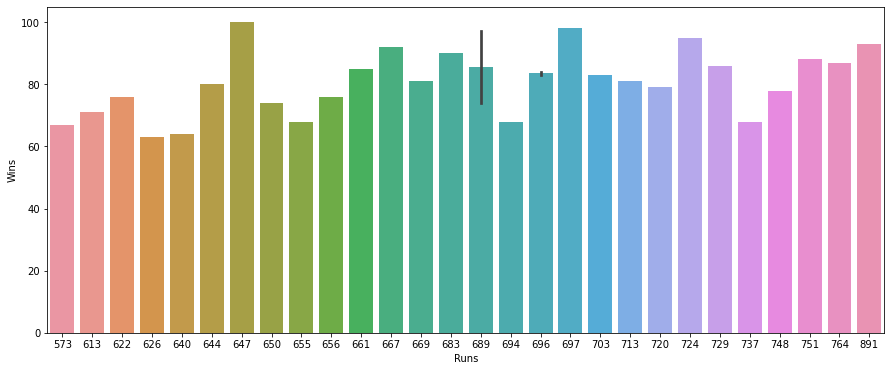

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(x="Runs", y="Wins", data=df)
plt.show()

"Runs" are distributed unevenly with respect to "Wins"

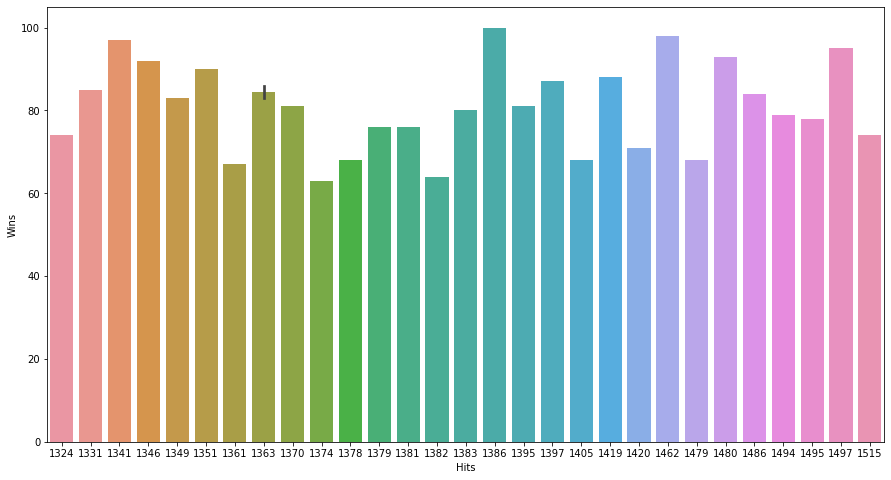

In [88]:
plt.figure(figsize=(15,8))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

"Hits" are distributed unevenly with respect to "Wins"

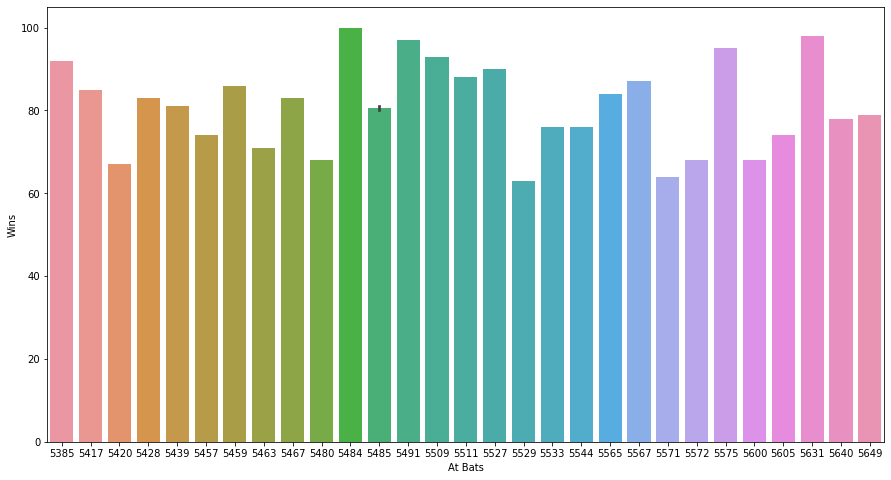

In [89]:
plt.figure(figsize=(15,8))
sns.barplot(x="At Bats", y="Wins", data=df)
plt.show()

"At Bats" are distributed unevenly with respect to "Wins"

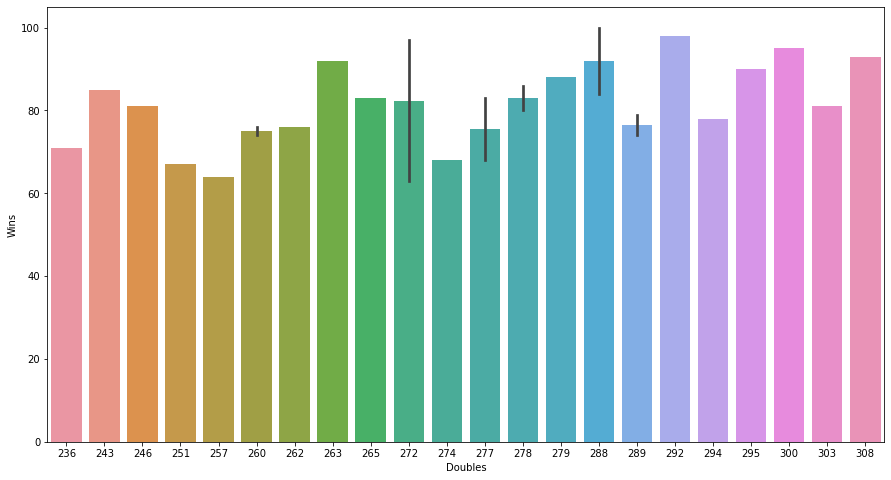

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

"Doubles" are distributed but with no linear pattern with respect to "Wins"

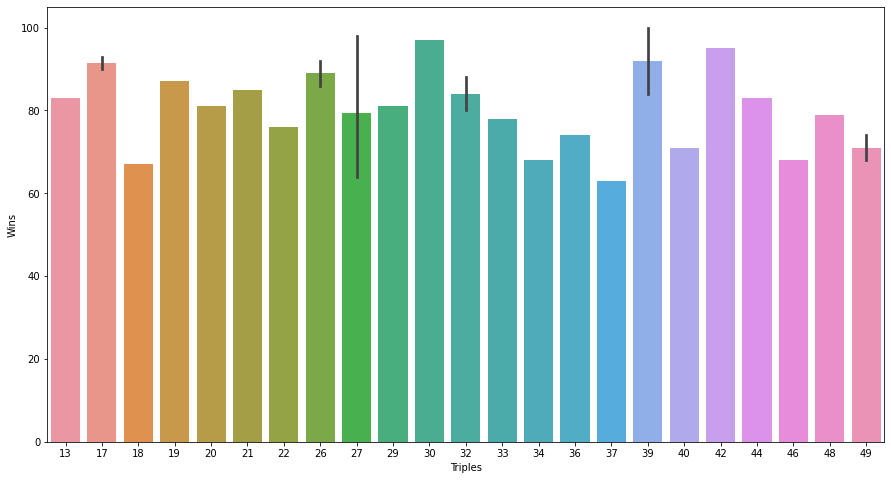

In [91]:
plt.figure(figsize=(15,8))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

"Triples" are showing uneven pattern with respect to "wins"

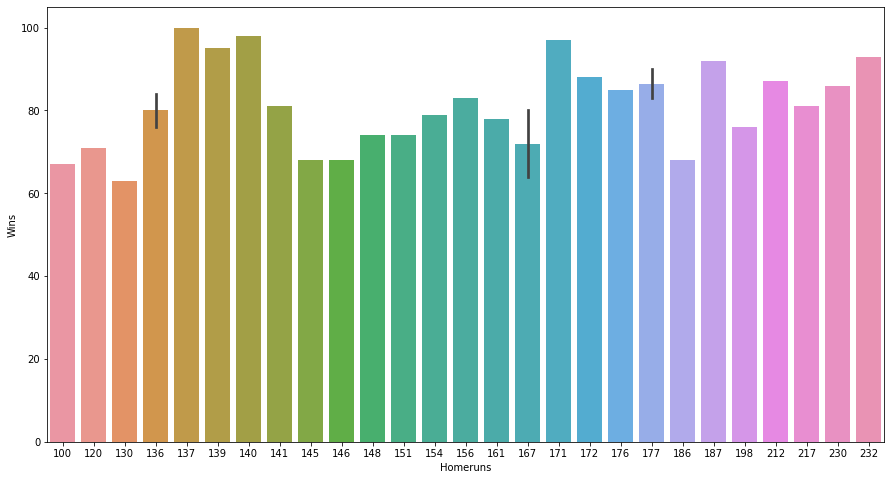

In [92]:
plt.figure(figsize=(15,8))
sns.barplot(x="Homeruns", y="Wins", data=df)
plt.show()

"Homeruns" do not show any visible patterns with respect to "Wins"

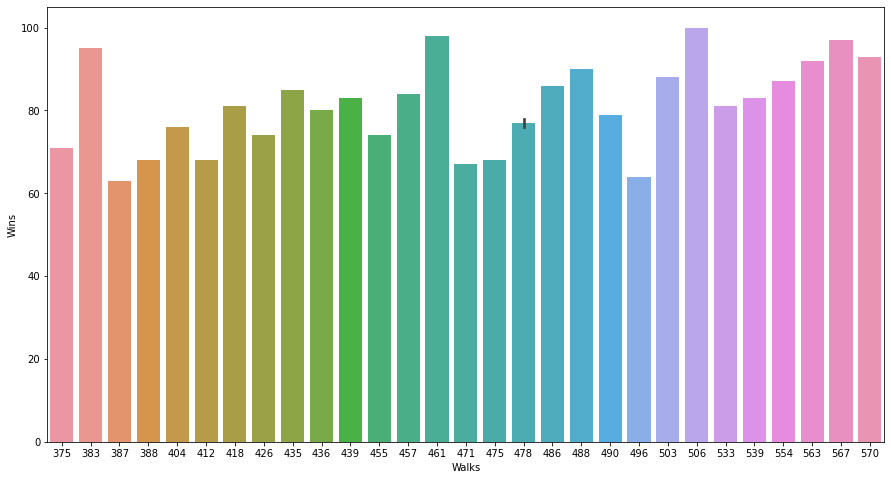

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(x="Walks", y="Wins", data=df)
plt.show()

"Walks" shows uneven pattern with respect to "Wins"

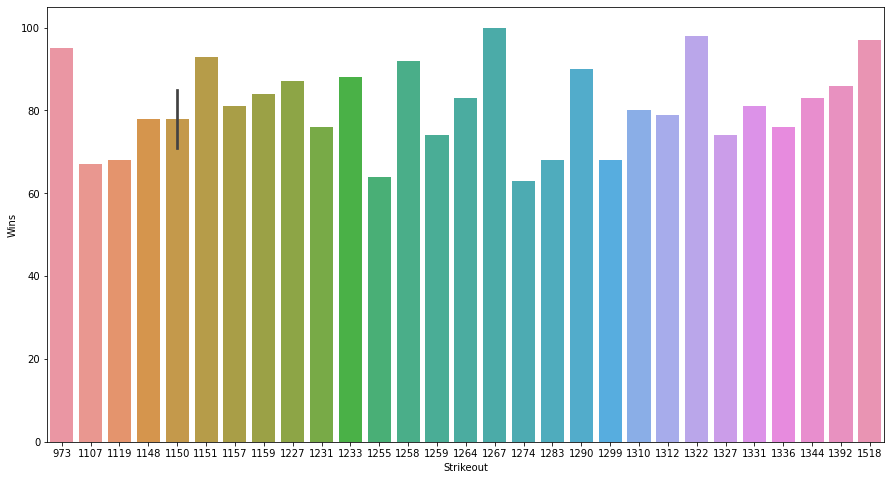

In [94]:
plt.figure(figsize=(15,8))
sns.barplot(x="Strikeout", y="Wins", data=df)
plt.show()

"Strikeout" shows uneven pattern with respect to "Wins"

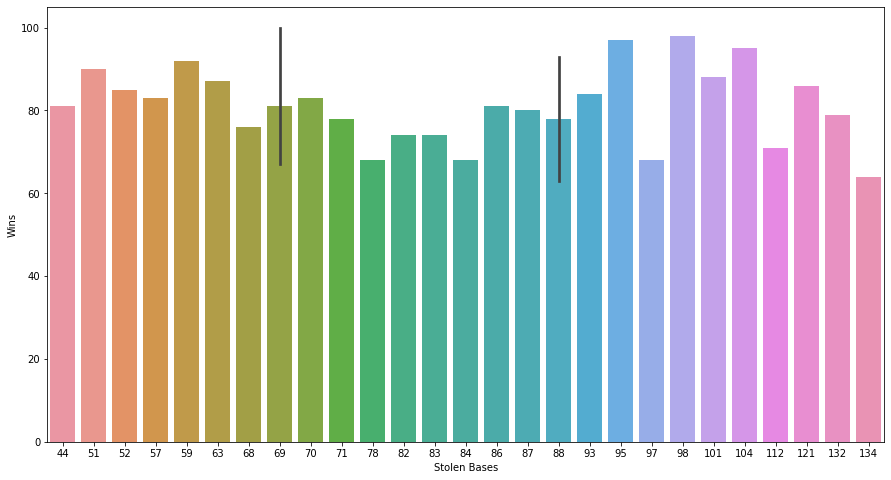

In [95]:
plt.figure(figsize=(15,8))
sns.barplot(x="Stolen Bases", y="Wins", data=df)
plt.show()

"Stolen Bases" shows uneven distribution with respect to "Wins"

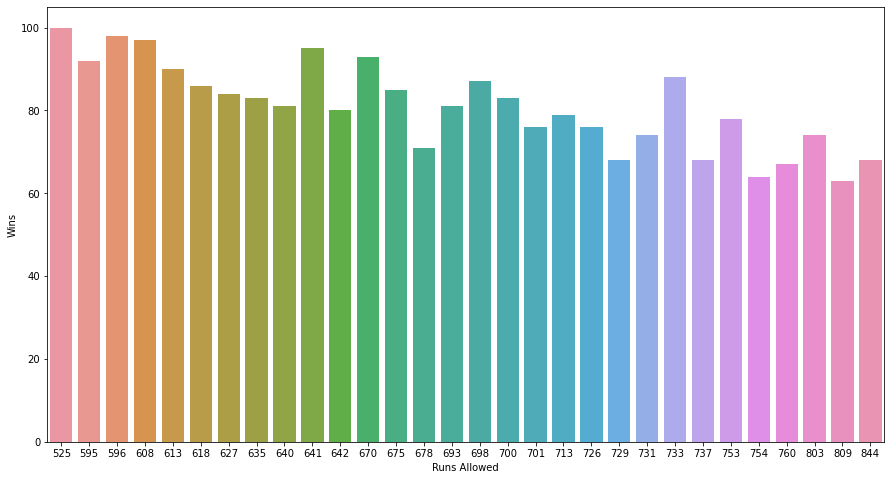

In [97]:
plt.figure(figsize=(15,8))
sns.barplot(x="Runs Allowed", y="Wins", data=df)
plt.show()

"Runs Allowed" shows decreasing distribution pattern with respect to "Wins"

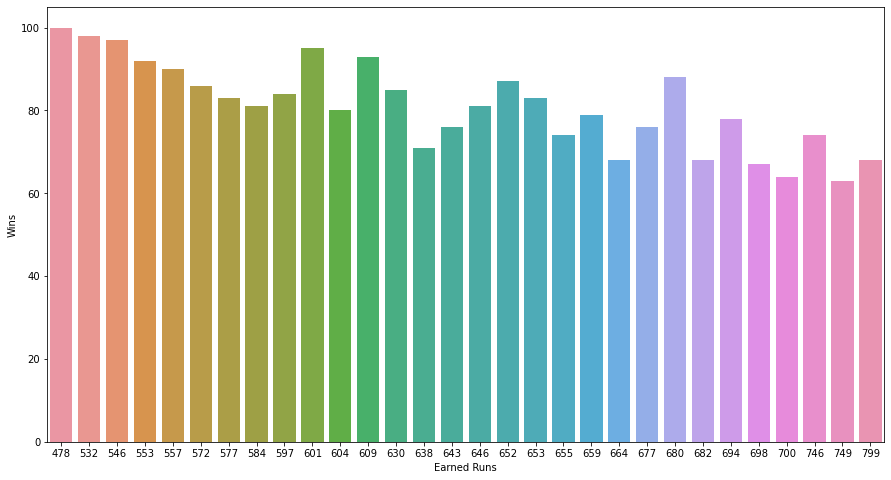

In [99]:
plt.figure(figsize=(15,8))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

"Earned runs" shows decreasing distribution pattern with respect to "Wins"

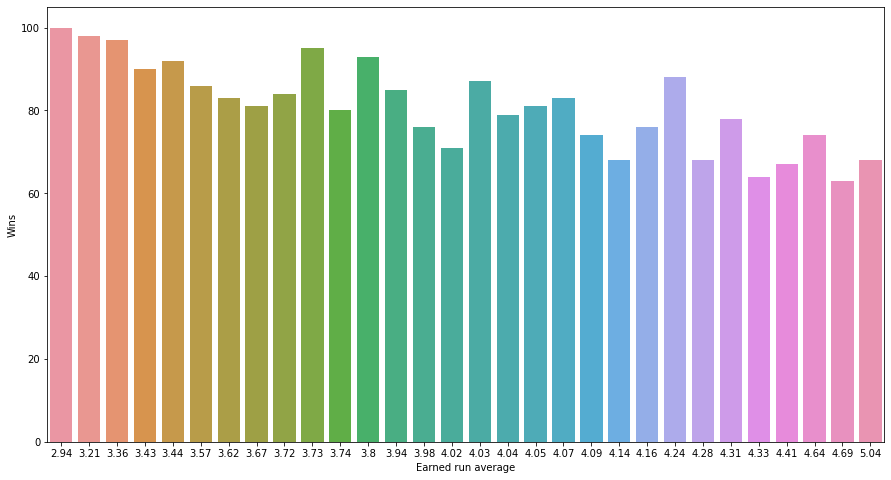

In [100]:
plt.figure(figsize=(15,8))
sns.barplot(x="Earned run average", y="Wins", data=df)
plt.show()

"Earned run average" shows slightly decreasing pattern with respect to "Wins"

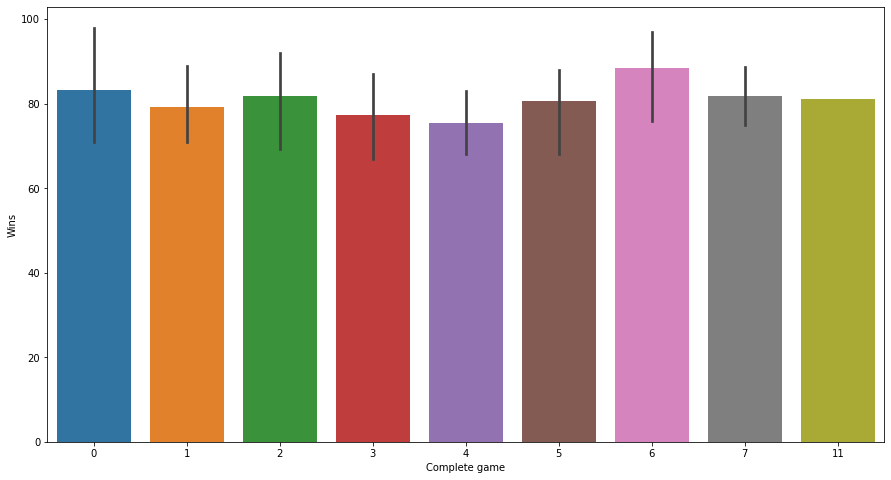

In [101]:
plt.figure(figsize=(15,8))
sns.barplot(x="Complete game", y="Wins", data=df)
plt.show()

"Complete game" do not shows any pattern with respect to "wins" 

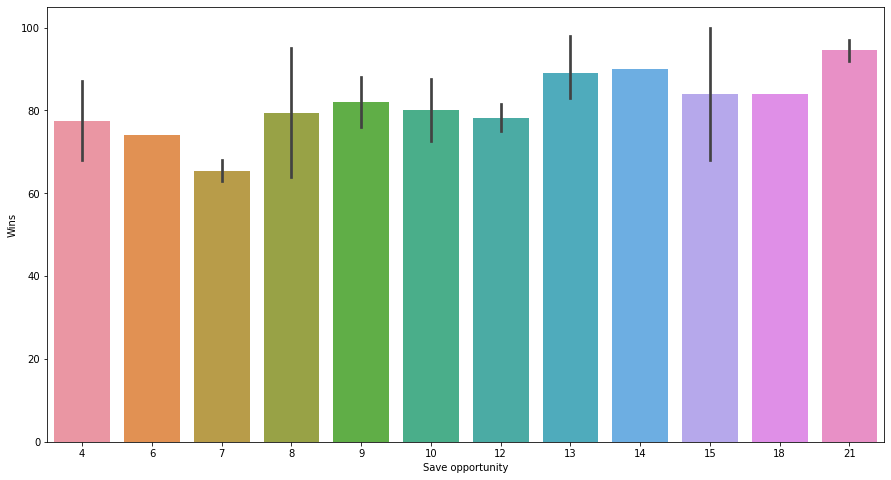

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(x="Save opportunity", y="Wins", data=df)
plt.show()

"Save opportunity" shows uneven distribution with respect to "Wins"

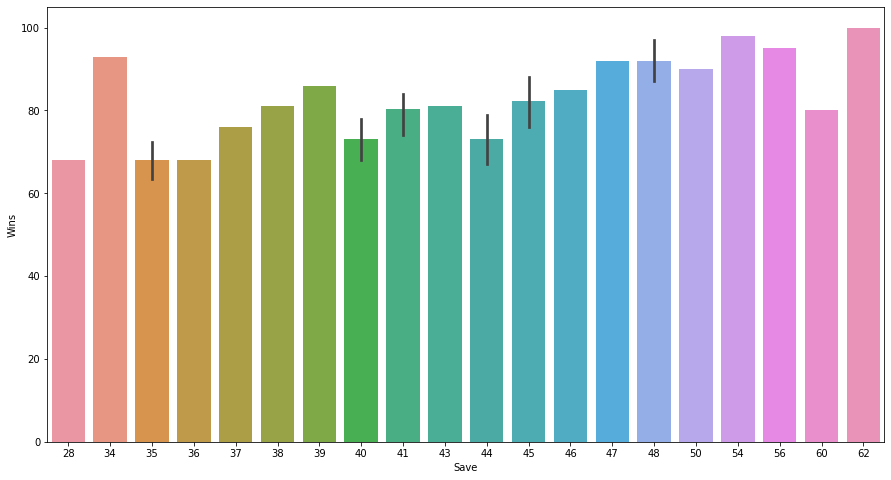

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(x="Save", y="Wins", data=df)
plt.show()

"save" shows slightly increasing distribution pattern with respect to "wins"

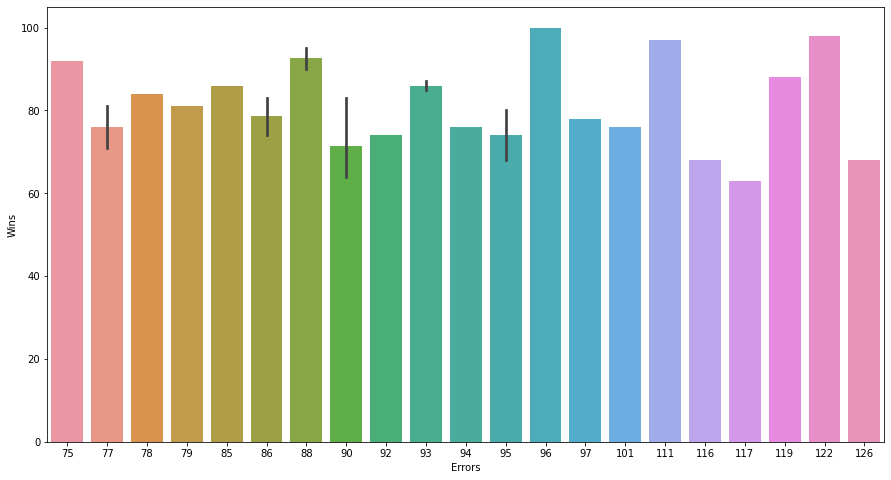

In [105]:
plt.figure(figsize=(15,8))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

"Errors" shows uneven distribution pattern with respect to "wins"

# Visualization of data using Joint plot

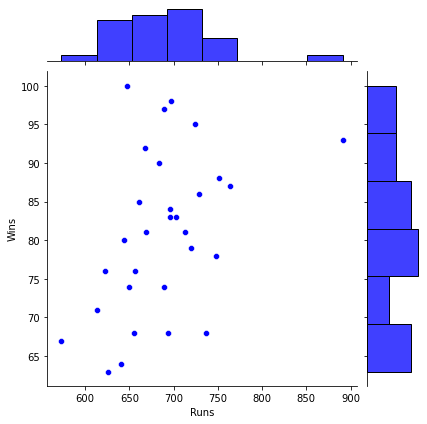

In [106]:
sns.jointplot(x="Runs", y="Wins", data=df, color="blue")

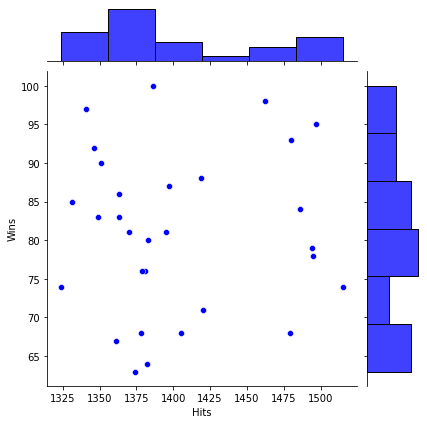

In [107]:
sns.jointplot(x="Hits", y="Wins", data=df, color="blue")

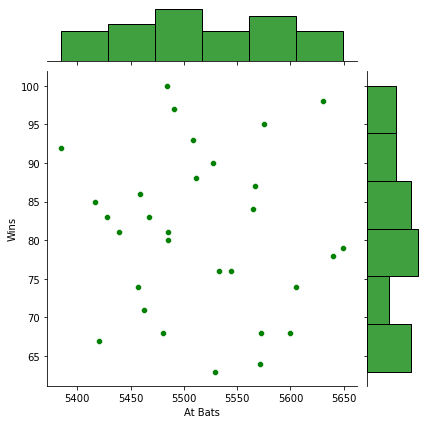

In [108]:
sns.jointplot(x="At Bats", y="Wins", data=df, color="green")

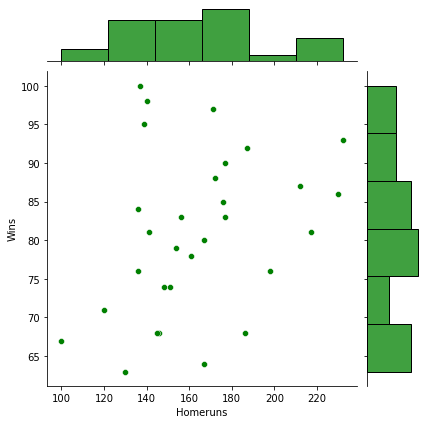

In [109]:
sns.jointplot(x="Homeruns", y="Wins", data=df, color="green")

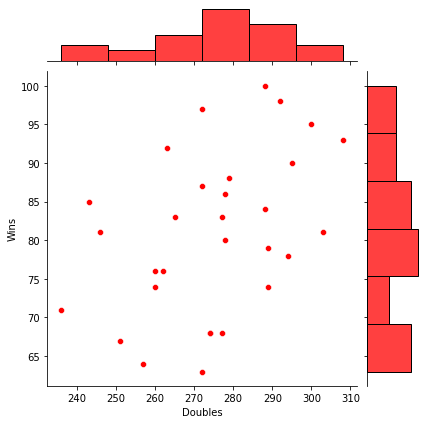

In [110]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="red")

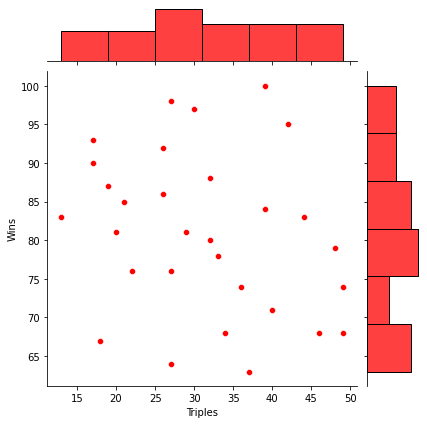

In [111]:
sns.jointplot(x="Triples", y="Wins", data=df, color="red")

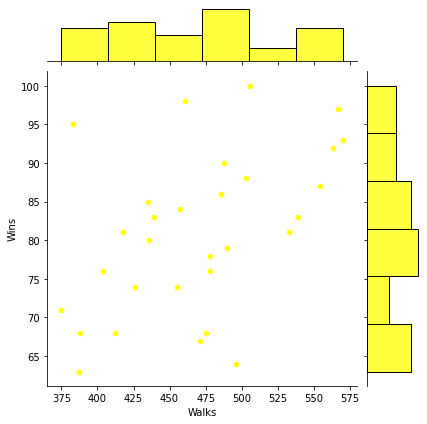

In [112]:
sns.jointplot(x="Walks", y="Wins", data=df, color="yellow")

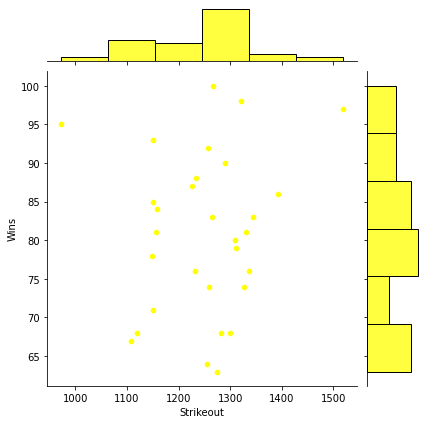

In [113]:
sns.jointplot(x="Strikeout", y="Wins", data=df, color="yellow")

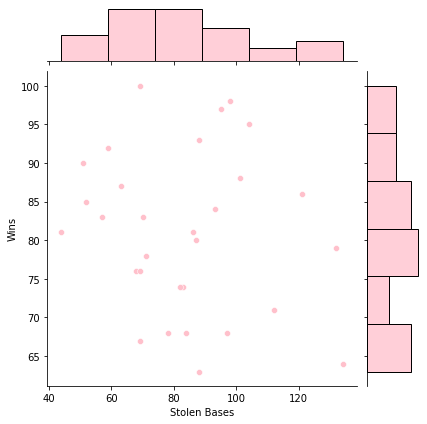

In [114]:
sns.jointplot(x="Stolen Bases", y="Wins", data=df, color="pink")

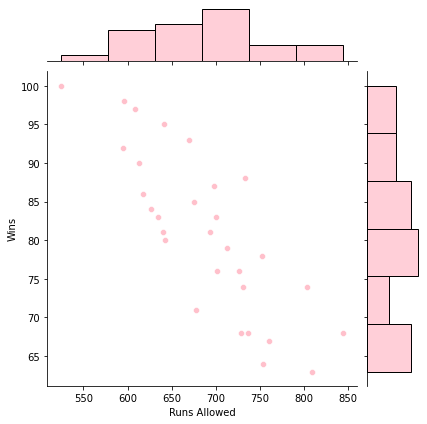

In [115]:
sns.jointplot(x="Runs Allowed", y="Wins", data=df, color="pink")

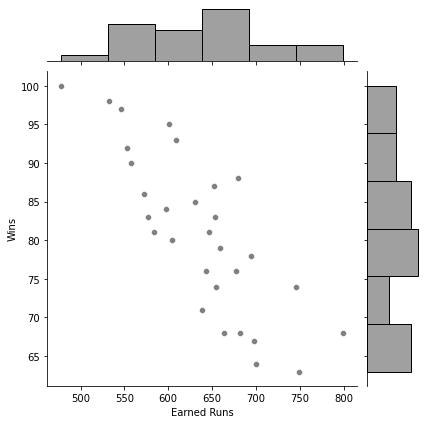

In [116]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="grey")

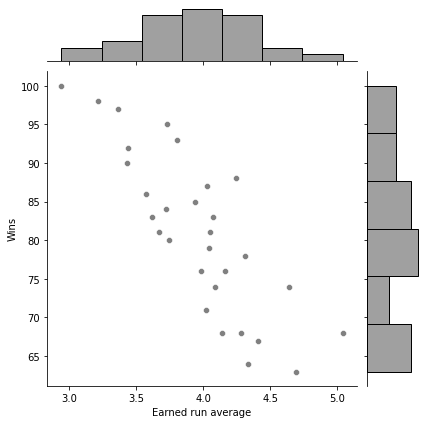

In [117]:
sns.jointplot(x="Earned run average", y="Wins", data=df, color="grey")

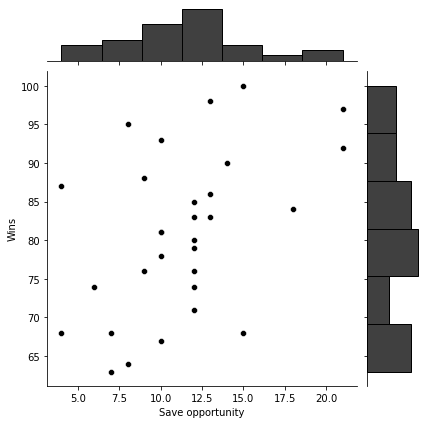

In [118]:
sns.jointplot(x="Save opportunity", y="Wins", data=df, color="black")

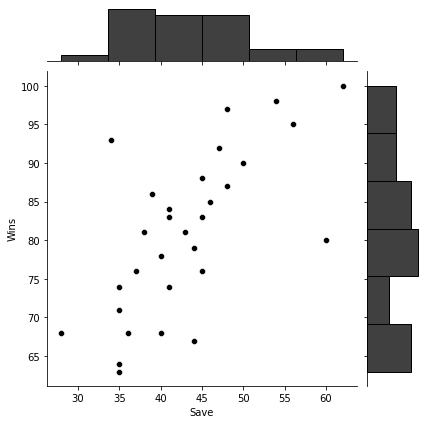

In [120]:
sns.jointplot(x="Save", y="Wins", data=df, color="black")

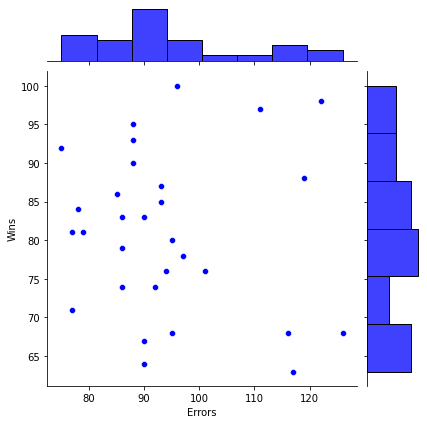

In [121]:
sns.jointplot(x="Errors", y="Wins", data=df, color="blue")

# Visualization of data using LM plot

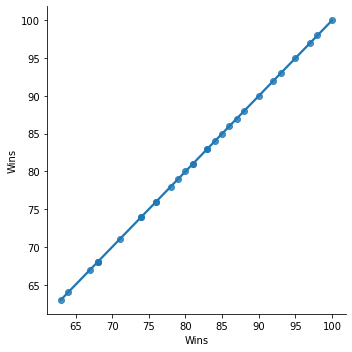

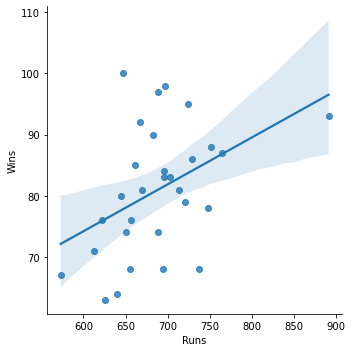

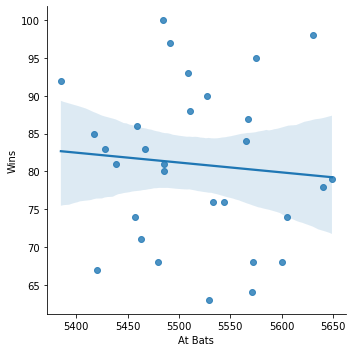

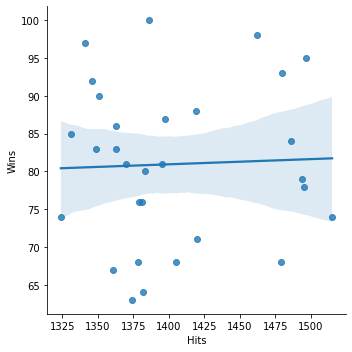

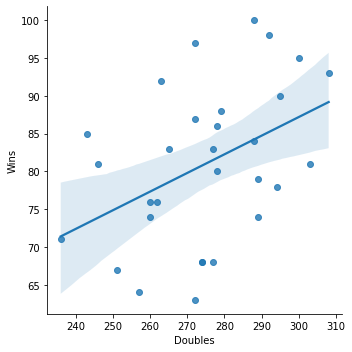

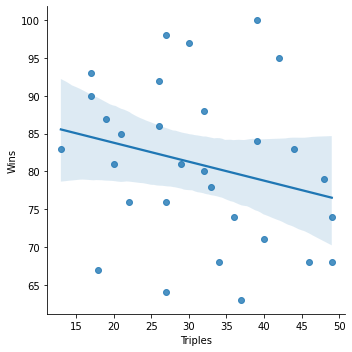

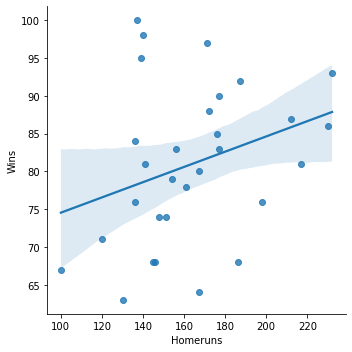

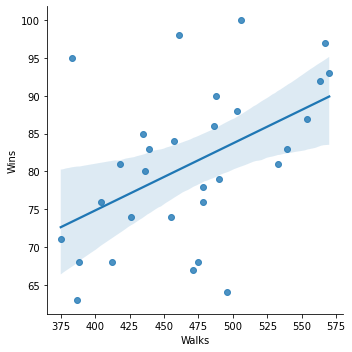

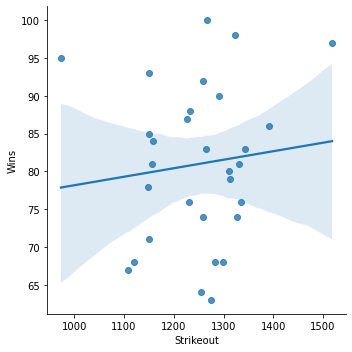

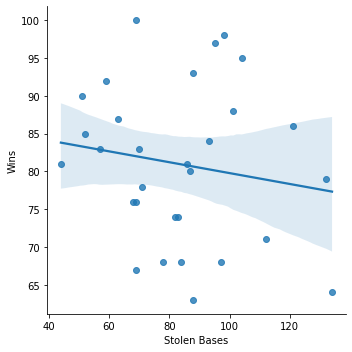

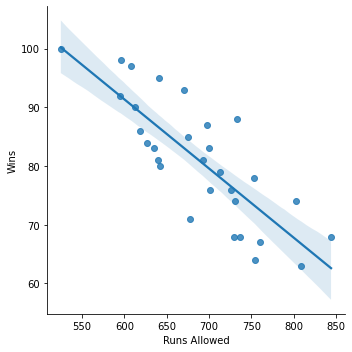

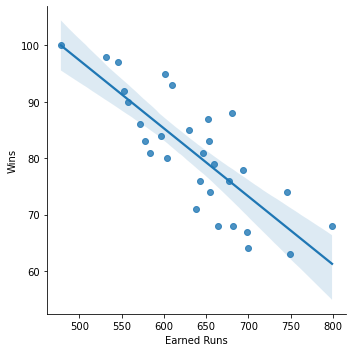

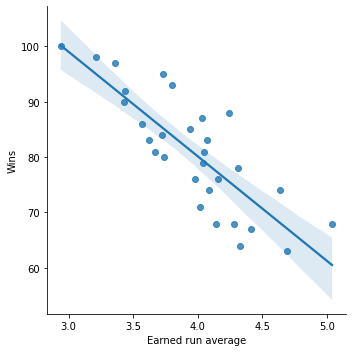

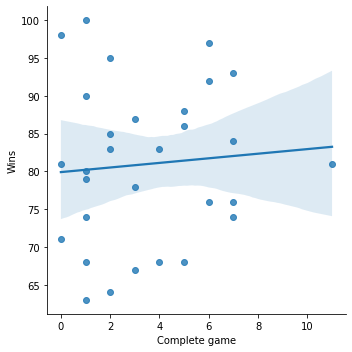

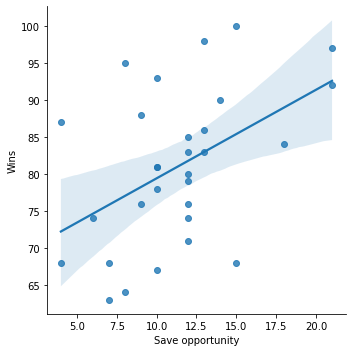

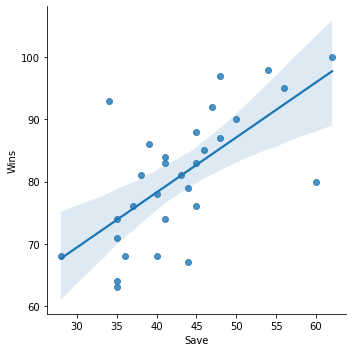

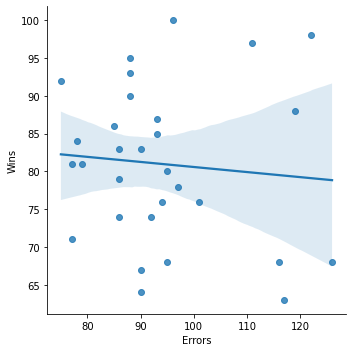

In [122]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

# Correlation using Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [123]:
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Earned Runs,Earned run average,Complete game,Save opportunity,Save,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeout,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


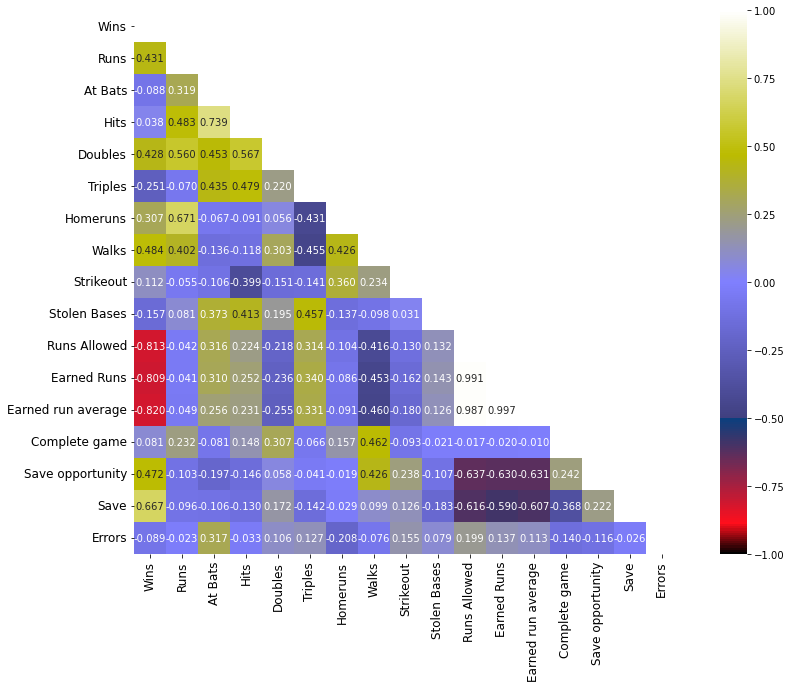

In [125]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Wins is having negative correlation with "Runs allowed","Earned Runs" and "Earned run average"
- Also we can se multicollinearity between "Runs allowed","Earned runs" and "Earned run average" so we need to drop highly correlated column.

In [127]:
df = df.drop(["Earned Runs", "Earned run average"], axis=1)

In [128]:
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Complete game,Save opportunity,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97


# Removing Outlier using z-score

In [129]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (30, 15)
Shape of the dataframe after removing outliers:  (29, 15)
Percentage of data loss post outlier removal:  3.3333333333333335


# Visualiztion of data using Distribution plot

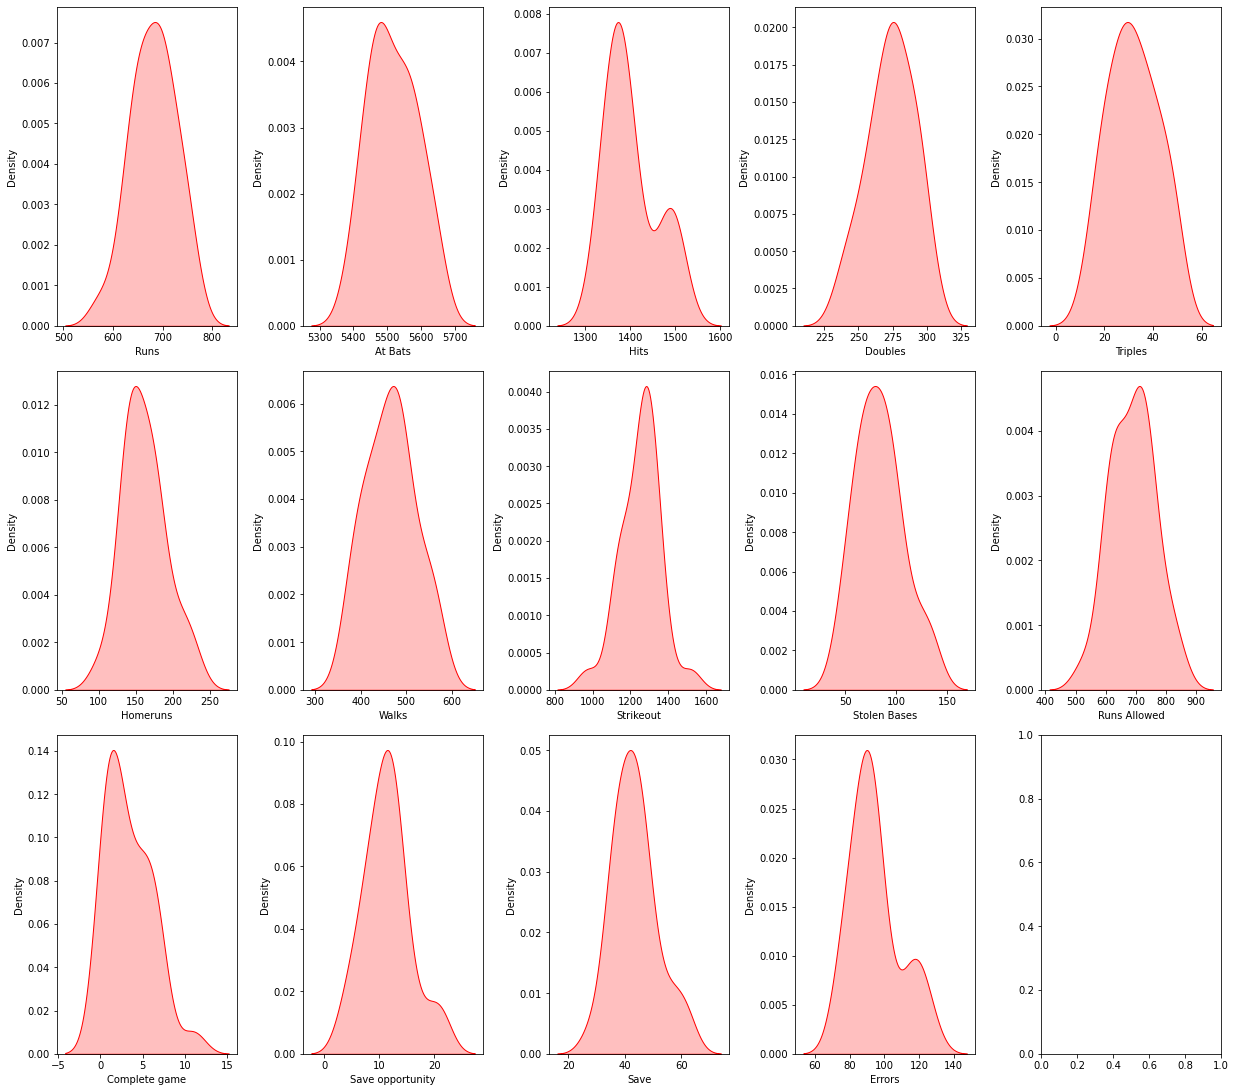

In [130]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Visualization of data using Histogram

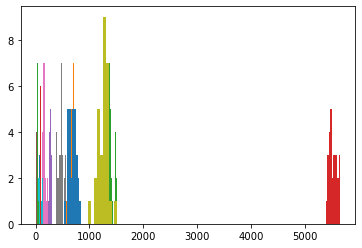

In [135]:
plt.hist(df['Wins'], bins= 10)
plt.hist(df['Runs'], bins= 10)
plt.hist(df['Hits'], bins= 10)
plt.hist(df['At Bats'], bins= 10)
plt.hist(df['Doubles'], bins= 10)
plt.hist(df['Triples'], bins= 10)
plt.hist(df['Homeruns'], bins= 10)
plt.hist(df['Walks'], bins= 10)
plt.hist(df['Strikeout'], bins= 10)
plt.hist(df['Stolen Bases'], bins= 10)
plt.hist(df['Runs Allowed'], bins= 10)
plt.hist(df['Save opportunity'], bins= 10)
plt.hist(df['Save'], bins= 10)
plt.hist(df['Errors'], bins= 10)
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [136]:
X = df.drop('Wins', axis=1)
Y = df['Wins']

- The dataset is divided into 2 variables namely 'X' for feature and 'Y' for label.

# Feature Scaling

In [138]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Complete game,Save opportunity,Save,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.363013,0.159299,-1.090948,-0.614898


A Standarization is occured which has helped us in having a uniform dataset value.

# Principal component analysis (PCA)

In [139]:
pca = PCA(n_components=14, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Complete game,Save opportunity,Save,Errors
0,-2.957996,-0.953253,2.246316,-1.216994,-2.357314,0.016125,0.626783,0.394846,0.882534,0.554004,-0.258275,-0.218896,-0.176119,0.192275
1,0.240394,0.417411,0.313526,-0.266703,-0.294763,0.504699,-0.962596,1.240400,0.256176,-0.827710,0.332404,-0.199270,-0.010978,0.486047
2,0.474141,-1.106621,0.911147,3.099281,-0.796596,-0.762581,1.542021,1.355597,-0.235204,0.159777,0.549155,0.082016,0.205976,-0.116133
3,-0.109473,1.848198,0.163538,1.093046,0.300077,-1.019805,-0.127039,0.024300,-0.562258,1.324900,-0.151055,-0.102882,0.737932,0.222658
4,-2.909976,-0.777732,-0.319362,1.853279,-0.148994,0.213535,-1.046595,0.188747,-1.268692,-0.264274,-0.364419,0.118457,-0.147223,-0.268420


By Using PCA technique, the skewness present in our dataset has been reduced.

# Power Transformation

In [140]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeout,Stolen Bases,Runs Allowed,Complete game,Save opportunity,Save,Errors
0,-1.531314,-0.498970,1.648944,-1.012066,-2.313643,0.160763,0.858484,0.615354,1.330458,1.040373,-0.514105,-0.560659,-0.467027,0.926858
1,0.107095,0.491777,0.264410,-0.152456,-0.222672,0.618698,-1.355468,1.627497,0.506216,-1.732195,0.707081,-0.507797,0.121365,2.093866
2,0.231348,-0.637813,0.701913,2.267201,-0.705892,-0.741631,1.791532,1.755747,-0.285770,0.395032,1.130860,0.236013,0.754554,-0.513110
3,-0.077322,1.155694,0.152658,0.908262,0.317725,-1.081383,-0.067982,0.116307,-0.903286,2.107384,-0.284258,-0.249929,1.884386,1.055454
4,-1.507223,-0.346199,-0.214158,1.442298,-0.086620,0.354539,-1.497998,0.343404,-2.446157,-0.425055,-0.744902,0.330416,-0.356914,-1.324429


# Variance Inflation Factor(VIF)

In [141]:
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Runs,1.006200
1,At Bats,1.017150
2,Hits,1.005998
3,Doubles,1.007102
4,Triples,1.005601
5,Homeruns,1.011452
6,Walks,1.013386
7,Strikeout,1.007557
8,Stolen Bases,1.010934
9,Runs Allowed,1.002451


- If a VIF is above 10 it shows high correlation and it is a cause for concern. 

- Right now we have almost all the feature columns within the range of intended VIF value. 

# Finding best random state for building Regression Models

In [143]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9354003737955622 on Random State 708


The random state for our model is 708 and best r2 score is 0.9354.

# Creating the training and testing data sets

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)

##### We will use 25% data for testing and remaining 75% for training the machine learning models.

# Machine Learning Model for Regression with Evaluation Metrics

In [145]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

- A function is built which splits training and testing features and labels.

- Then it trains the model, predicts the label, calculates the RMSE score.

- Then it generates the r2 score, calculates the cross-validation score and finally finds the difference between R2 score and cross validation score. 

In [146]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3.1488145790474475
R2 Score is: 93.54003737955622
Cross Validation Score: 23.06111666725267
R2 Score - Cross Validation Score is 70.47892071230356


In [147]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 3.26170768883574
R2 Score is: 93.06852111336403
Cross Validation Score: 24.999300689180675
R2 Score - Cross Validation Score is 68.06922042418336


In [149]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 3.5967315296795186
R2 Score is: 91.5714692804458
Cross Validation Score: 25.912111585548985
R2 Score - Cross Validation Score is 65.65935769489681


In [150]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 12.416554604011285
R2 Score is: -0.4472463300540186
Cross Validation Score: -44.95227047146326
R2 Score - Cross Validation Score is 44.50502414140924


In [151]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 8.916277250063503
R2 Score is: 48.203196579456375
Cross Validation Score: -106.37572195507374
R2 Score - Cross Validation Score is 154.57891853453012


In [152]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 11.268946283593781
R2 Score is: 17.26248985115124
Cross Validation Score: 4.476696469972123
R2 Score - Cross Validation Score is 12.785793381179118


In [153]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 11.477862195913401
R2 Score is: 14.166298303408398
Cross Validation Score: 2.551808587759752
R2 Score - Cross Validation Score is 11.614489715648647


In [154]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 11.91926761680038
R2 Score is: 7.437522209732306
Cross Validation Score: -192.50344898200228
R2 Score - Cross Validation Score is 199.94097119173458


In [155]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 8.479806486916761
R2 Score is: 53.150203038220944
Cross Validation Score: -28.707085426328394
R2 Score - Cross Validation Score is 81.85728846454934


In [156]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 10.071916401559339
R2 Score is: 33.90630153720859
Cross Validation Score: -7.042778529469336
R2 Score - Cross Validation Score is 40.94908006667793


In [157]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 14.637451963447377
R2 Score is: -39.59401403708325
Cross Validation Score: 0.8835494861448033
R2 Score - Cross Validation Score is -40.47756352322805


# Hyper parameter tuning on the best ML Model

In [158]:
# Choosing Linear Regression

fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

##### After comparing all the regression models I have selected Linear Regression as my best model and have listed down it's parameters above referring the sklearn webpage.

In [159]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)

##### Using Grid search CV for hyper paramter tuning best ML model

In [160]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [161]:
GSCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': False,
 'positive': True}

##### GSCV has provided me with best parameters list out of all the combinations.

In [162]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -34.123787859986265


### I have successfully incorporated the Hyper Parameter Tuning on the Final Model and received the R2 score for it.

# Saving the best model

In [163]:
filename = "FinalModel_bb.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_bb.pkl']

Finally, I am saving my best regression model using the joblib library.